In [5]:
import numpy as np
import pandas as pd
import datetime

import pytest

from Outcomes import outcomes
from SEIR.utils import config



import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import glob, os, sys
from pathlib import Path

#import seaborn as sns
import pyarrow.parquet as pq
import click
import pyarrow as pa

import os

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import glob, os, sys
from pathlib import Path
#import seaborn as sns
import matplotlib._color_data as mcd
import pyarrow.parquet as pq
import click

import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.backends.backend_pdf import PdfPages

from SEIR import NPI, setup, file_paths
from SEIR.utils import config
import pathlib

config.set_file('config_mod_a.yml')
#config.set_file('config_ca_forecast_med_cases_mtr.yml')

snpi_fn = 'model_output/snpi/California/Cases/2020.08.18.08:43:53.UTC/000000001.2020.08.18.08:43:53.UTC.snpi.parquet'
npi_r =  pq.read_table(snpi_fn).to_pandas()

scenario = 'Cases'
deathrate = 'med'
spatial_config = config["spatial_setup"]
stoch_traj_flag = True
index = 0
run_id = 0
prefix = 0
spatial_base_path = pathlib.Path(spatial_config["base_path"].get())
scenario = scenario
deathrate = deathrate
stoch_traj_flag= stoch_traj_flag # Truthy: stochastic simulation, Falsy: determnistic mean of the binomial draws
nsim = 10
interactive = False
write_csv = False
write_parquet = True

s = setup.Setup(
    setup_name=config["name"].get() + "_" + str(scenario),
    spatial_setup=setup.SpatialSetup(
        setup_name=spatial_config["setup_name"].get(),
        geodata_file=spatial_base_path / spatial_config["geodata"].get(),
        mobility_file=spatial_base_path / spatial_config["mobility"].get(),
        popnodes_key=spatial_config["popnodes"].get(),
        nodenames_key=spatial_config["nodenames"].get()
    ),
    nsim=nsim,
    npi_scenario=scenario,
    npi_config=config["interventions"]["settings"][scenario],
    seeding_config=config["seeding"],
    ti=config["start_date"].as_date(),
    tf=config["end_date"].as_date(),
    interactive=interactive,
    write_csv=write_csv,
    write_parquet=write_parquet,
    dt=config["dt"].as_number(),
    first_sim_index = index,
    in_run_id = run_id,
    in_prefix = prefix,
    out_run_id = run_id,
    out_prefix = prefix
)



In [39]:
npi_r

,geoid,npi_name,start_date,end_date,parameter,reduction
0,06003,local_variance,2020-01-01,2020-12-31,r0,-0.042654
1,06091,local_variance,2020-01-01,2020-12-31,r0,0.153895
2,06049,local_variance,2020-01-01,2020-12-31,r0,-0.062698
3,06105,local_variance,2020-01-01,2020-12-31,r0,0.128401
4,06051,local_variance,2020-01-01,2020-12-31,r0,-0.104026
...,...,...,...,...,...,...
1292,06071,worship_closure_1,"2020-03-19,2020-07-15","2020-05-14,2020-11-30",r0,0.626464
1293,06065,worship_closure_1,"2020-03-19,2020-07-15,2020-10-23","2020-05-20,2020-09-21,2020-11-30",r0,0.353764
1294,06059,worship_closure_1,"2020-03-19,2020-07-15,2020-11-17","2020-05-22,2020-09-07,2020-11-30",r0,0.238919
1295,06073,worship_closure_1,"2020-03-19,2020-07-15","2020-05-07,2020-08-30",r0,0.740412


In [3]:
npi_r['npi_name'].unique()

array(['local_variance', 'seas_jan', 'seas_feb', 'seas_mar', 'seas_may',
       'seas_jun', 'seas_jul', 'seas_aug', 'seas_sep', 'seas_oct',
       'seas_nov', 'seas_dec', 'seas_jan2', 'Lockdown', 'P2', 'P2A',
       'P2B', 'P3', 'R1', 'R2', 'sah_2', 'T1', 'T2', 'T3', 'T4'],
      dtype=object)

In [4]:
mean = []
meanr = []
for geoid in s.spatset.nodenames:
    mean.append(len(npi_r[npi_r['geoid'] == geoid]))

In [5]:
np.mean(mean)

21.551724137931036

In [6]:
np.mean(npi_r.reduction)

0.2063593622967208

In [9]:
remove =  'hair_closure_1'
remove = 'T2'
npi_r.loc[npi_r['npi_name'] == remove]

,geoid,npi_name,start_date,end_date,parameter,reduction
1166,06003,T2,2020-11-28,2020-12-09,r0,0.390270
1167,06091,T2,2020-08-31,2020-09-24,r0,0.259168
1168,06049,T2,2020-11-16,2020-11-27,r0,0.781547
1169,06051,T2,2020-11-16,2020-12-05,r0,0.681464
1170,06043,T2,2020-11-28,2020-12-05,r0,0.461171
1171,06027,T2,"2020-09-15,2020-11-28","2020-10-05,2020-12-05",r0,0.800081
1172,06063,T2,2020-11-16,2020-11-27,r0,0.408211
1173,06011,T2,"2020-10-13,2020-11-16","2020-11-15,2020-11-23",r0,0.284489
1174,06021,T2,2020-10-26,2020-11-15,r0,0.564144
1175,06035,T2,2020-08-31,2020-09-21,r0,0.645040


In [10]:
npi_r.loc[npi_r['npi_name'] != remove,'reduction'] = 0
out_df = pa.Table.from_pandas(npi_r, preserve_index=False)
pa.parquet.write_table(out_df,snpi_fn)
npi_r

,geoid,npi_name,start_date,end_date,parameter,reduction
0,06003,local_variance,2020-01-01,2021-01-31,r0,0.0
1,06091,local_variance,2020-01-01,2021-01-31,r0,0.0
2,06049,local_variance,2020-01-01,2021-01-31,r0,0.0
3,06105,local_variance,2020-01-01,2021-01-31,r0,0.0
4,06051,local_variance,2020-01-01,2021-01-31,r0,0.0
...,...,...,...,...,...,...
1245,06063,T4,2020-10-06,2020-11-01,r0,0.0
1246,06093,T4,2020-10-06,2020-11-08,r0,0.0
1247,06009,T4,2020-10-26,2020-11-15,r0,0.0
1248,06023,T4,2020-10-06,2020-11-15,r0,0.0


In [6]:

#snpi_fn = 'subset.parquet'
snpi = pq.read_table(snpi_fn).to_pandas()
npi = NPI.NPIBase.execute(
    npi_config=s.npi_config,
    global_config=config,
    geoids=s.spatset.nodenames,
    #loaded_df = snpi
)
p_draw = setup.parameters_load(snpi_fn.replace('snpi', 'spar')[:-8],
    'parquet',
    len(s.t_inter),
    s.nnodes
)

#npi = NPI.NPIBase.execute(
#    npi_config=s.npi_config,
#    global_config=config,
#    geoids=s.spatset.nodenames,
#    loaded_df = snpi)

parameters = setup.parameters_reduce(p_draw, npi, s.dt)
beta = parameters[1]

R:  seas_dec 1.0
R:  bar_closure_1 1.0
R:  dine_closure_1 1.0
R:  hair_closure_1 0.0
R:  malls_closure_1 0.0
R:  masks_1 1.0
R:  park_closure_1 1.0
R:  school_closure_1 1.0
R:  stay_at_home_1 0.0
R:  worship_closure_1 0.0
R:  worship_closure 1.0


In [35]:
npi.getReductionToWrite()

,geoid,npi_name,start_date,end_date,parameter,reduction
0,06003,local_variance,2020-01-01,2020-12-31,r0,0.065958
1,06091,local_variance,2020-01-01,2020-12-31,r0,-0.172966
2,06049,local_variance,2020-01-01,2020-12-31,r0,0.105795
3,06105,local_variance,2020-01-01,2020-12-31,r0,0.123029
4,06051,local_variance,2020-01-01,2020-12-31,r0,-0.012747
...,...,...,...,...,...,...
1292,06071,worship_closure_1,"2020-03-19,2020-07-15","2020-05-14,2020-11-30",r0,0.308781
1293,06065,worship_closure_1,"2020-03-19,2020-07-15,2020-10-23","2020-05-20,2020-09-21,2020-11-30",r0,0.514224
1294,06059,worship_closure_1,"2020-03-19,2020-07-15,2020-11-17","2020-05-22,2020-09-07,2020-11-30",r0,0.262165
1295,06073,worship_closure_1,"2020-03-19,2020-07-15","2020-05-07,2020-08-30",r0,0.608860


In [ ]:
(npi.getReductionToWrite() == npi_r).all()

```
                if not isinstance(reduction, float):
                    reduction[reduction>0] = 1
                self.reductions[param] += reduction

            # FIXME: getReductionToWrite() returns a concat'd set of stacked scenario params, which is
            # serialized as a giant dataframe to parquet. move this writing to be incremental, but need to
            # verify there are no downstream consumers of the dataframe. in the meantime, limit the amount
            # of data we'll pin in memory
            if not self.reduction_cap_exceeded:
                if len(self.reduction_params) < REDUCTION_METADATA_CAP:
                    self.reduction_params.append(sub_npi.getReductionToWrite())
                else:
                    self.reduction_cap_exceeded = True
                    self.reduction_params.clear()

        for param in REDUCE_PARAMS:
            self.reductions[param] = self.reductions[param]
```

In [7]:
a = npi.getReduction('r0')

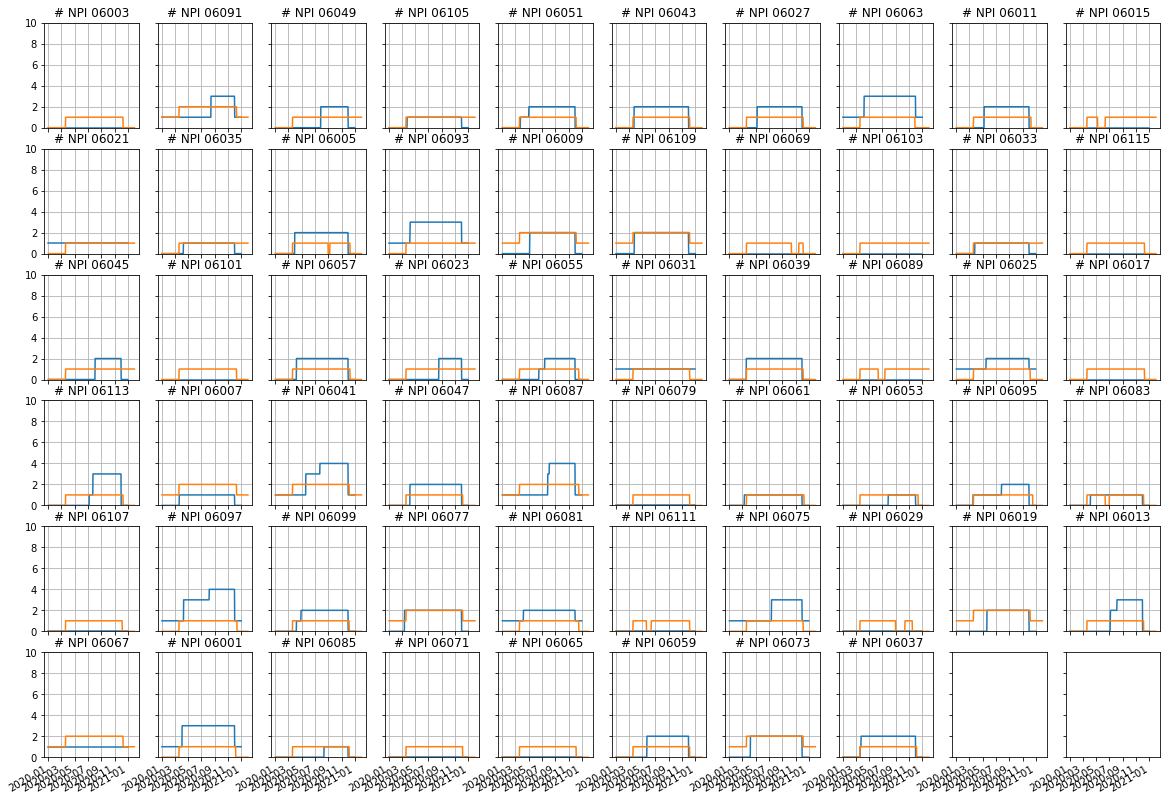

In [8]:
fig, axes = plt.subplots(6,10, figsize=(20,15), sharex = True, sharey = True)
fig.set_facecolor('white')

for i, pl in enumerate(s.spatset.nodenames):
    ax = axes.flat[i]
    ax.plot(a.T[pl])
    ax.plot(b.T[pl])
    ax.set_title(f'# NPI {pl}')
    ax.grid()
    ax.set_ylim(0,10)
#npi.getReduction('r0').T.mean(axis=1).plot(legend=False, ax = ax, lw = 4);
fig.autofmt_xdate()

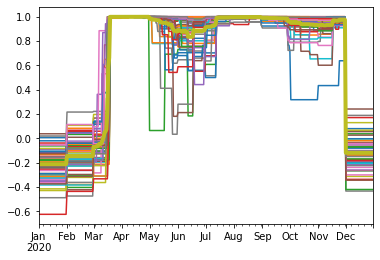

In [36]:
ax = npi.getReduction('r0').T.plot(legend=False);
npi.getReduction('r0').T.mean(axis=1).plot(legend=False, ax = ax, lw = 4);
ax.set_facecolor('white')

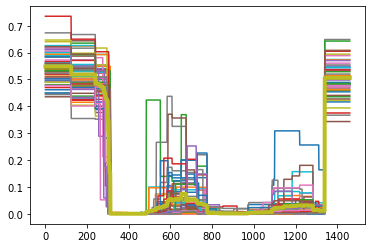

In [37]:
plt.plot(beta);
plt.plot(np.mean(beta, axis=1), lw = 4);

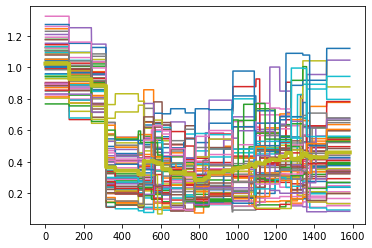

In [31]:
plt.plot(beta);
plt.plot(np.mean(beta, axis=1), lw = 4);

In [9]:
loaded_df = snpi

In [10]:
loaded_df.index = loaded_df.geoid
loaded_df = loaded_df[loaded_df['npi_name'] == 'local_variance']
parameters = loaded_df[['npi_name','start_date','end_date','parameter','reduction']]#.copy()
parameters

,npi_name,start_date,end_date,parameter,reduction
geoid,,,,,
51720,local_variance,"2020-04-15,2020-05-15,2020-05-15","2020-04-20,2020-05-20,2020-05-20",r0,0.496656
51017,local_variance,"2020-04-01,2020-05-01","2020-04-15,2020-05-15",r0,0.480746
42023,local_variance,"2020-04-15,2020-05-15,2020-05-15","2020-04-20,2020-05-20,2020-05-20",r0,0.509052


In [11]:
loaded_df

,geoid,npi_name,parameter,start_date,end_date,reduction
geoid,,,,,,
51720,51720,local_variance,r0,"2020-04-15,2020-05-15,2020-05-15","2020-04-20,2020-05-20,2020-05-20",0.496656
51017,51017,local_variance,r0,"2020-04-01,2020-05-01","2020-04-15,2020-05-15",0.480746
42023,42023,local_variance,r0,"2020-04-15,2020-05-15,2020-05-15","2020-04-20,2020-05-20,2020-05-20",0.509052


In [12]:
parameters["start_date"] = [[datetime.date.fromisoformat(date) for date in strdate.split(",")] for strdate in parameters["start_date"]]
parameters

/Users/chadi/opt/miniconda3/envs/covidSP/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,npi_name,start_date,end_date,parameter,reduction
geoid,,,,,
51720,local_variance,"[2020-04-15, 2020-05-15, 2020-05-15]","2020-04-20,2020-05-20,2020-05-20",r0,0.496656
51017,local_variance,"[2020-04-01, 2020-05-01]","2020-04-15,2020-05-15",r0,0.480746
42023,local_variance,"[2020-04-15, 2020-05-15, 2020-05-15]","2020-04-20,2020-05-20,2020-05-20",r0,0.509052


In [13]:
        print(self.parameters["start_date"])        self.parameters["end_date"] = [datetime.date.fromisoformat(date) for date in self.parameters["end_date"]]
        self.affected_geoids = set(self.parameters.index)
        self.param_name = self.parameters["parameter"].unique()

SyntaxError: invalid syntax (<ipython-input-13-dc1faf74dbe9>, line 1)

In [ ]:
[datetime.date(2000,1,1),datetime.date(2000,2,1), datetime.date(2000,1,1),datetime.date(2000,2,1)].astype("str")

In [ ]:
b = set([1,2,4])

In [44]:
import time
s.ti.time.date()

AttributeError: 'datetime.date' object has no attribute 'time'